In [176]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import pydiffvg

In [177]:
%load_ext autoreload
%autoreload 2
import covergan


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
import requests

from bs4 import BeautifulSoup

In [179]:
# url = "https://yandex.ru/images/search?lr=213&text=disgust%20emoji%20png"

In [180]:
# resp = requests.get(url)

In [181]:
# soup = BeautifulSoup(resp.text)

In [182]:
# labels = {'neutral': 0, 'happy': 1, 'sad': 2, 'surprise': 3, 'fear': 4, 'disgust': 5, 'anger': 6, 'contempt': 7}

In [183]:
# soup


In [184]:
# images = soup.findAll('img')

In [185]:
# images

In [52]:
# # CREATE FOLDER
# import requests
# import os
# from tqdm import tqdm
# from bs4 import BeautifulSoup as bs
# from urllib.parse import urljoin, urlparse
# def is_valid(url):
#     """
#     Проверяем, является ли url действительным URL
#     """
#     parsed = urlparse(url)
#     return bool(parsed.netloc) and bool(parsed.scheme)
# def get_all_images(url):
#     """
#     Возвращает все URL‑адреса изображений по одному `url`
#     """
#     soup = bs(requests.get(url).content, "html.parser")
#     urls = []
#     for img in tqdm(soup.find_all("img"), "Получено изображение"):
#         img_url = img.attrs.get("data-src")
#         print(img_url)
#         if not img_url:
#             # если img не содержит атрибута src, просто пропускаем
#             continue
#         # сделаем URL абсолютным, присоединив имя домена к только что извлеченному URL
#         img_url = urljoin(url, img_url)
#         # удалим URL‑адреса типа '/hsts-pixel.gif?c=3.2.5'
#         try:
#             pos = img_url.index("?")
#             img_url = img_url[:pos]
#         except ValueError:
#             pass
#         # наконец, если URL действителен
#         if is_valid(img_url):
#             urls.append(img_url)
#     return urls
# def download(url, pathname):
#     """
#     Загружает файл по URL‑адресу и помещает его в папку `pathname`
#     """
#     # если путь не существует, создать dir
#     if not os.path.isdir(pathname):
#         os.makedirs(pathname)
#     # загружаем тело ответа по частям, а не сразу
#     response = requests.get(url, stream=True)
#     # получить общий размер файла
#     file_size = int(response.headers.get("Content-Length", 0))
#     # получаем имя файла
#     filename = os.path.join(pathname, url.split("/")[-1])
#     # индикатор выполнения, изменение единицы измерения на байты вместо итераций (по умолчанию tqdm)
#     progress = tqdm(response.iter_content(1024), f"Загружен {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
#     with open(filename, "wb") as f:
#         for data in progress.iterable:
#             # записываем прочитанные данные в файл
#             f.write(data)
#             # обновление индикатора выполнения вручную
#             progress.update(len(data))
# def main(url, path):
#     # получить все изображения
#     imgs = get_all_images(url)
#     for img in imgs:
#         # скачать для каждого img
#         download(img, path)


In [ ]:
# main("https://www.pngegg.com/en/search?q=emoji+anger","./anger")

In [ ]:
labels = {'neutral': 0, 'happy': 1, 'sad': 2, 'surprise': 3, 'fear': 4, 'disgust': 5, 'anger': 6, 'contempt': 7}

In [3]:
import importlib, sys
importlib.reload(covergan)

<module 'covergan' from '/home/dmitriy/OVE/covergan/__init__.py'>

In [186]:
import pandas as pd
data = pd.read_csv('/home/dmitriy/OVE/official_data/artemis_dataset_release_v0.csv')

In [5]:
val_key = dict(zip(data.emotion.unique(), data.index))
key_val = {v:k for k,v in val_key.items()}
key_val

{0: 'something else',
 1: 'sadness',
 2: 'contentment',
 3: 'awe',
 4: 'amusement',
 5: 'excitement',
 6: 'fear',
 7: 'disgust',
 8: 'anger'}

In [6]:
ndata = data[data['art_style']=='Color_Field_Painting'].groupby(['painting', 'art_style'])['emotion'].apply(lambda x: ','.join(x)).reset_index()

In [7]:
ndata

painting             art_style  \
0                  ad-reinhardt_abstract-painiting-1963  Color_Field_Painting   
1                   ad-reinhardt_abstract-painting-1957  Color_Field_Painting   
2                   ad-reinhardt_abstract-painting-1961  Color_Field_Painting   
3                   ad-reinhardt_abstract-painting-1966  Color_Field_Painting   
4                 ad-reinhardt_abstract-painting-1966-1  Color_Field_Painting   
...                                                 ...                   ...   
1597          william-scott_orange-black-and-white-1960  Color_Field_Painting   
1598  william-scott_orange-black-and-white-compositi...  Color_Field_Painting   
1599                        william-scott_painting-1959  Color_Field_Painting   
1600            william-scott_white-sand-and-ochre-1961  Color_Field_Painting   
1601                   yves-gaucher_ocres-jaune-et-vert  Color_Field_Painting   

                                                emotion  
0     sadness,something else,fear,something else,som...  
1              disgust,disgust,fear,something else,fear  
2     contentment,anger,contentment,sadness,contentment  
3          contentment,fear,something else,fear,sadness  
4     sadness,sadness,sadness,something else,somethi...  
...                                                 ...  
1597  contentment,awe,excitement,disgust,anger,conte...  
1598  something else,awe,something else,something el...  
1599  contentment,something else,something else,some...  
1600  something else,awe,disgust,something else,amus...  
1601  anger,something else,awe,contentment,something...  

[1602 rows x 3 columns]

In [8]:
ndata = ndata.drop([197,198,199]).reset_index()

In [9]:
# %load_ext autoreload
# %autoreload 2
import covergan

In [10]:
ndata.index

RangeIndex(start=0, stop=1599, step=1)

In [92]:
import os

# Get the list of all files and directories
path = "/home/dmitriy/OVE/data"
dir_list = os.listdir(path)
dir_list

['sad', 'fear', 'surprise', 'smiling', 'anger', 'contempt', 'disgust']

In [187]:
label= {'smiling': 0, 'sad': 1, 'surprise': 2, 'fear': 3, 'disgust': 4, 'anger': 5, 'contempt': 6}

In [238]:
key_val = {v:k for k,v in label.items()}
key_val

{0: 'smiling',
 1: 'sad',
 2: 'surprise',
 3: 'fear',
 4: 'disgust',
 5: 'anger',
 6: 'contempt'}

In [188]:
inputs = []
labels = []
for d1 in dir_list:
    dir_new = os.path.join(path,d1)
    images = os.listdir(dir_new)
    for image in images:
        inputs.append(image)
        labels.append(label[d1])



In [189]:
data = pd.DataFrame({"image":inputs,"label":labels})
data.to_csv('out.csv')

In [190]:
data[data['image'].isin(data[data.duplicated('image')]['image'])]

Empty DataFrame
Columns: [image, label]
Index: []

In [198]:
from colorer.music_palette_dataset import PaletteDatasetSmiles,ImageDatasetSmiles
dataset = PaletteDatasetSmiles(8,156,'name','/home/dmitriy/OVE/covergan/weights','/home/dmitriy/OVE/data1',pandas_dir='/home/dmitriy/OVE/out.csv')
dataset_image = ImageDatasetSmiles(8,156,'name','/home/dmitriy/OVE/covergan/weights','/home/dmitriy/OVE/data1',pandas_dir='/home/dmitriy/OVE/out.csv')

In [11]:
# from tqdm.notebook import tqdm
# import cv2
# import os
# with open("1.txt","w") as f:
#     for index in tqdm(ndata.index):
#         art_style = ndata.iloc[index]['art_style']
#         name = ndata.loc[index]['painting']
#         image = cv2.imread(os.path.join('/home/dmitriy/OVE/covergan/weights','/home/dmitriy/OVE/wikiart', art_style, name + ".jpg"))
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         if image.shape[0]>1000 or image.shape[1]>1000 or image.shape[2]>1000:
#             f.write(name)
#             f.write(f"{image.shape}")
#             f.write('\n')

In [12]:
# from colorer.music_palette_dataset import PaletteDataset,ImageDataset
# dataset = PaletteDataset(8,1599,'name','/home/dmitriy/OVE/covergan/weights','/home/dmitriy/OVE/wikiart',pandas_dir='/home/dmitriy/OVE/official_data/artemis_dataset_release_v0.csv')
# dataset_image = ImageDataset(8,1599,'name','/home/dmitriy/OVE/covergan/weights','/home/dmitriy/OVE/wikiart',pandas_dir='/home/dmitriy/OVE/official_data/artemis_dataset_release_v0.csv')

In [13]:
# dataset.data = ndata
# dataset_image.data = ndata

In [14]:
dataset[4]

(tensor([1., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([44., 35., 56., 41., 32., 53., 43., 33., 54., 40., 31., 50., 47., 36.,
         58., 43., 35., 51.,  4.,  0., 10., 47., 39., 56.]))

In [162]:
import torch

In [207]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [208]:
from colorer.models.colorer_dropout import Colorer2
z_dim=8
num_gen_layers=5
colors_count = 8
colorer = Colorer2(
        z_dim=z_dim,
        audio_embedding_dim=7,
        num_layers=num_gen_layers,
        colors_count=colors_count)

In [209]:
colorer

Colorer2(
  (model_): Sequential(
    (0): Linear(in_features=15, out_features=14, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=14, out_features=13, bias=True)
    (5): Dropout(p=0.2, inplace=False)
    (6): BatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=13, out_features=12, bias=True)
    (9): Dropout(p=0.2, inplace=False)
    (10): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2)
    (12): Linear(in_features=12, out_features=11, bias=True)
    (13): Dropout(p=0.2, inplace=False)
    (14): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): LeakyReLU(negative_slope=0.2)
    (16): Linear(in_features=11, out_features=24, bi

In [210]:
from colorer.models.gan_colorer import ColorerDiscriminator

In [211]:
disc = ColorerDiscriminator(audio_embedding_dim=7, num_layers=3,colors_count= colors_count).to(device)

In [212]:
disc

ColorerDiscriminator(
  (adv_layer): Sequential(
    (0): Linear(in_features=31, out_features=21, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=21, out_features=11, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=11, out_features=8, bias=True)
    (7): Sigmoid()
  )
)

In [213]:
def weighted_mse_loss(input, target, weight=None):
    if weight is None:
        max_weight = input.size()[1]
        weight = torch.tensor([(max_weight - i // 3) // 3 for i in range(max_weight)]).to(input.device)
        weight = weight.repeat((len(input), 1))
    return (weight * (input - target) ** 2).mean()

In [214]:
def get_noise(n_samples, input_dim, device):
    """
    Function for creating noise vectors: Given the dimensions (n_samples, input_dim)
    creates a tensor of that shape filled with random numbers from the normal distribution.
    Parameters:
        n_samples: the number of samples to generate, a scalar
        input_dim: the dimension of the input vector, a scalar
        device: the device type
    """
    return torch.randn(n_samples, input_dim, device=device)

In [215]:
from torch.utils.data.dataloader import DataLoader
batch_size=16
train_dataloader = DataLoader(dataset,drop_last=True, batch_size=batch_size, shuffle=True)

In [216]:
def get_checkpoint_filename(checkpoint_root: str, checkpoint_name: str, epoch: int = None) -> str:
    suffix = f"-{epoch}" if epoch is not None else ""
    return f"{checkpoint_root}/{checkpoint_name}{suffix}.pt"

In [217]:
from captioner_train import logger
import os


def load_checkpoint(checkpoint_root: str, checkpoint_name: str,
                    models) -> int:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    filename = get_checkpoint_filename(checkpoint_root, checkpoint_name)

    if os.path.isfile(filename):
        logger.info(f"Found {filename}, loading")
        checkpoint = torch.load(filename, map_location=device)
        for i, model in enumerate(models):
            model.load_state_dict(checkpoint[f"{i}_state_dict"])
            print('Loaded')
        epochs_done = checkpoint[f"epochs_done"]
        logger.info(f"{filename} loaded")
        return epochs_done
    else:
        return 0

In [218]:
def save_checkpoint(checkpoint_root: str, checkpoint_name: str, epochs_done: int, backup_epochs: int,
                    models):
    checkpoint_dict = {}
    for i, model in enumerate(models):
        checkpoint_dict[f"{i}_state_dict"] = model.state_dict()
    checkpoint_dict[f"epochs_done"] = epochs_done

    if not backup_epochs:
        # Unconditional save
        filename = get_checkpoint_filename(checkpoint_root, checkpoint_name)
        torch.save(checkpoint_dict, filename)
        logger.info(f"{filename} saved")
    if backup_epochs and epochs_done and epochs_done % backup_epochs == 0:
        # Regular backup
        filename = get_checkpoint_filename(checkpoint_root, checkpoint_name, epochs_done)
        torch.save(checkpoint_dict, filename)
        logger.info(f"Backup {filename} saved")

In [219]:
disc

ColorerDiscriminator(
  (adv_layer): Sequential(
    (0): Linear(in_features=31, out_features=21, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=21, out_features=11, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=11, out_features=8, bias=True)
    (7): Sigmoid()
  )
)

In [220]:
from tqdm.notebook import tqdm
import logging
import torch
from torch.utils.data.dataloader import DataLoader
n_epochs = 10# training_params["n_epochs"]
lr = 3e-4
checkpoint_root ='/home/dmitriy/OVE/covergan/weights'
backup_epochs = 1
disc_slices = 6
gen_opt = torch.optim.Adam(colorer.parameters(), lr=lr)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)
criterion = torch.nn.MSELoss()

# model_name = f'colorer_{colorer.color_type}_{colorer.colors_count}_colors'
model_name = f'smile_colorer_{colorer.colors_count}_colors_{train_dataloader.dataset.sorted_color}'
print("Trying to load checkpoint.")
epochs_done = load_checkpoint(checkpoint_root, model_name, [colorer, gen_opt])

if epochs_done:
    logger.info(f"Loaded a checkpoint with {epochs_done} epochs done")

log_interval = 5
for epoch in range(epochs_done + 1, n_epochs + epochs_done + 1):
    colorer.train()
    running_D_test_loss = 0.0
    running_G_test_loss = 0.0
    count = 0
    for X_batch, y_batch in tqdm(train_dataloader):
        torch.cuda.empty_cache()
        y_batch = y_batch.to(device)

        cur_batch_size = len(X_batch)
        X_batch = X_batch.float().to(device)
        X_batch_disc = X_batch

        real_outputs = disc(X_batch_disc, y_batch)
        real_label = torch.ones(y_batch.shape[0], colors_count).to(device)
        z = get_noise(cur_batch_size, z_dim, device=device)

        fake_inputs = colorer(z, X_batch_disc)
        fake_outputs = disc(X_batch_disc, fake_inputs)

        fake_label = torch.zeros(fake_inputs.shape[0], colors_count).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), dim=0)
        targets = torch.cat((real_label, fake_label), dim=0)
        D_loss = criterion(outputs, targets)
        running_D_test_loss += D_loss.item()
        disc_opt.zero_grad()
        D_loss.backward()
        disc_opt.step()
        gen_opt.zero_grad()
        z = get_noise(cur_batch_size, z_dim, device=device)

        fake_inputs = colorer(z, X_batch_disc)
        fake_outputs = disc(X_batch_disc, fake_inputs)
        fake_targets = torch.ones(fake_inputs.shape[0], colors_count).to(device)
        G_loss = criterion(fake_outputs, fake_targets)
        gen_opt.zero_grad()
        G_loss.backward()
        gen_opt.step()
        running_G_test_loss += G_loss.item()

        if (count + 1) % log_interval == 0:
                print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'
                      .format(epoch, count, D_loss.item(), G_loss.item()))
                save_checkpoint(checkpoint_root, model_name, epoch, backup_epochs, [colorer, disc, gen_opt, disc_opt])
        count+=1
    avg_G_test_loss = running_G_test_loss / (count + 1)
    avg_D_test_loss = running_D_test_loss / (count+ 1)
    print('Train LOSS: colorer {}, disc {}'.format(avg_G_test_loss, avg_D_test_loss))


Trying to load checkpoint.


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-1.pt saved


Epoch 1 Iteration 4: discriminator_loss 0.413 generator_loss 0.271
Train LOSS: colorer 0.24289400279521942, disc 0.3764688342809677


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-2.pt saved


Epoch 2 Iteration 4: discriminator_loss 0.419 generator_loss 0.270
Train LOSS: colorer 0.24291992485523223, disc 0.3540973007678986


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-3.pt saved


Epoch 3 Iteration 4: discriminator_loss 0.362 generator_loss 0.268
Train LOSS: colorer 0.24199248254299163, disc 0.32722315192222595


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-4.pt saved


Epoch 4 Iteration 4: discriminator_loss 0.335 generator_loss 0.267
Train LOSS: colorer 0.2413938045501709, disc 0.3135466486215591


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-5.pt saved


Epoch 5 Iteration 4: discriminator_loss 0.315 generator_loss 0.268
Train LOSS: colorer 0.2411656767129898, disc 0.28680277764797213


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-6.pt saved


Epoch 6 Iteration 4: discriminator_loss 0.309 generator_loss 0.266
Train LOSS: colorer 0.24063548743724822, disc 0.26516020596027373


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-7.pt saved


Epoch 7 Iteration 4: discriminator_loss 0.268 generator_loss 0.267
Train LOSS: colorer 0.24064382016658784, disc 0.24395052194595337


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-8.pt saved


Epoch 8 Iteration 4: discriminator_loss 0.244 generator_loss 0.267
Train LOSS: colorer 0.2408928543329239, disc 0.2155168056488037


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-9.pt saved


Epoch 9 Iteration 4: discriminator_loss 0.224 generator_loss 0.267
Train LOSS: colorer 0.24060340225696564, disc 0.18894315510988235


  0%|          | 0/9 [00:00<?, ?it/s]

Backup /home/dmitriy/OVE/covergan/weights/smile_colorer_8_colors_sorted-10.pt saved


Epoch 10 Iteration 4: discriminator_loss 0.195 generator_loss 0.268
Train LOSS: colorer 0.24103138148784636, disc 0.18274665623903275


In [221]:
from outer.models.discriminator import Discriminator
from outer.models.my_gen_fixed_6figs32_good import MyGeneratorFixedSixFigs32Good

generator_type = MyGeneratorFixedSixFigs32Good
discriminator_type = Discriminator

In [223]:
num_gen_layers = 5
num_disc_conv_layers = 4
num_disc_linear_layers = 4
z_dim = 8# Dimension of the noise vector
# z_dim = 512  # Dimension of the noise vector

# Painter properties
path_count = 3
path_segment_count = 4
disc_slices = 6
max_stroke_width = 0.01  # relative to the canvas size

In [224]:
gen = MyGeneratorFixedSixFigs32Good(z_dim,7,num_gen_layers,400,max_stroke_width)
gen

MyGeneratorFixedSixFigs32Good(
  (model_): Sequential(
    (0): Linear(in_features=15, out_features=241, bias=True)
    (1): BatchNorm1d(241, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=241, out_features=467, bias=True)
    (4): BatchNorm1d(467, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=467, out_features=693, bias=True)
    (7): BatchNorm1d(693, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ELU(alpha=1.0)
    (9): Linear(in_features=693, out_features=919, bias=True)
    (10): BatchNorm1d(919, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ELU(alpha=1.0)
    (12): Linear(in_features=919, out_features=1142, bias=True)
    (13): Tanh()
  )
)

In [225]:
disc = Discriminator(400,7,3,2)
disc

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 24, kernel_size=(6, 6), stride=(4, 4), padding=(1, 1), bias=False)
    (1): LayerNorm((100, 100), eps=1e-05, elementwise_affine=True)
    (2): ELU(alpha=1.0)
    (3): Conv2d(24, 48, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1), bias=False)
    (4): LayerNorm((33, 33), eps=1e-05, elementwise_affine=True)
    (5): ELU(alpha=1.0)
    (6): Conv2d(48, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): LayerNorm((16, 16), eps=1e-05, elementwise_affine=True)
    (8): ELU(alpha=1.0)
  )
  (adv_layer): Sequential(
    (0): Linear(in_features=12295, out_features=192, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=192, out_features=1, bias=True)
  )
)

In [226]:
import matplotlib.pyplot as plt
dataset_image[6][1].shape[1]

400

In [228]:
def plot_losses(epoch: int, cur_step: int, display_steps: int, bin_steps: int, losses: [(str, [float])]):
    if cur_step % display_steps == 0 and cur_step > 0:
        loss_stats = []

        for loss_name, loss_values in losses:
            loss_mean = sum(loss_values[-display_steps:]) / display_steps
            if "loss" not in loss_name.lower() and "metric" not in loss_name.lower():
                loss_name += " Loss"
            loss_stats.append(f"{loss_name}: {loss_mean}")

            num_examples = (len(loss_values) // bin_steps) * bin_steps
            plt.plot(
                range(num_examples // bin_steps),
                torch.Tensor(loss_values[:num_examples]).view(-1, bin_steps).mean(1),
                label=loss_name
            )

        logger.info(f"Epoch {epoch} (step {cur_step}): " + ", ".join(loss_stats))
        plt.legend()
        print("Saving losses to png file")
        import covergan_train
        # plt.savefig(f"{covergan_train.logger.plots_dir}/losses-{epoch}-{cur_step}.png")
        plt.show()
        plt.close()
    elif cur_step == 0:
        logger.info("The training is working")

In [229]:
from matplotlib.lines import Line2D
from torchvision.transforms.functional import to_pil_image
import numpy as np

In [230]:
def get_gradient_penalty(disc, real, fake, audio_embedding):
    # Mix the images together
    epsilon = torch.rand((real.size(0), 1, 1, 1), device=real.device)
    mixed_images = (real * epsilon + fake * (1 - epsilon)).requires_grad_(True)

    # Calculate the critic's scores on the mixed images
    mixed_scores = disc(mixed_images, audio_embedding)

    # Take the gradient of the scores with respect to the images
    gradient = torch.autograd.grad(
        inputs=mixed_images,
        outputs=mixed_scores,
        grad_outputs=torch.ones_like(mixed_scores),
        create_graph=True,
        retain_graph=True,
    )[0]
    gradient = gradient.view(len(gradient), -1)

    # Calculate the magnitude of every row
    gradient_norm = gradient.norm(2, dim=1)

    # Penalize the mean squared distance of the gradient norms from 1
    penalty = ((gradient_norm - 1) ** 2).mean()
    return penalty

In [231]:
def plot_grad_flow(named_parameters, model_name: str, epoch=None, cur_step=None):
    """Plots the gradients flowing through different layers in the network during training.
    Can be used for checking for possible gradient vanishing/exploding problems.

    Usage: Plug this function in Trainer class after loss.backwards() as
    `plot_grad_flow(self.model.named_parameters())` to visualize the gradient flow
    """

    # Calculate the stats
    avg_grads = []
    max_grads = []
    layers = []
    for n, p in named_parameters:
        if p.requires_grad and ("bias" not in n) and p.grad is not None:
            layers.append(n)
            avg_grads.append(p.grad.abs().mean())
            max_grads.append(p.grad.abs().max())

    # Initialize plot canvas
    fig = plt.figure()
    fig.set_size_inches(6, 6)

    # Plot
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.2, lw=1, color="c")  # Max gradients
    plt.bar(np.arange(len(max_grads)), avg_grads, alpha=0.2, lw=1, color="b")  # Mean gradients
    plt.hlines(0, 0, len(avg_grads) + 1, lw=2, color="k")  # Zero gradient line
    plt.xticks(range(0, len(avg_grads), 1), layers, rotation="vertical")

    # Set display options
    plt.xlim(left=0, right=len(avg_grads))
    plt.ylim(bottom=-0.001, top=0.02)  # Zoom in on the lower gradient regions
    plt.xlabel('Layers')
    plt.ylabel('average gradient')
    plt.title(f'Gradient flow in {model_name}')
    plt.grid(True)
    plt.legend(
        [
            Line2D([0], [0], color="c", lw=4),
            Line2D([0], [0], color="b", lw=4),
            Line2D([0], [0], color="k", lw=4)
        ],
        [
            'max-gradient',
            'mean-gradient',
            'zero-gradient'
        ]
    )

    fig.tight_layout()
    plt.plot()
    if epoch is not None:
        print("Saving grad flow to png file")
        import covergan_train
        # plt.savefig(f"{covergan_train.logger.plots_dir}/grad-flow-{epoch}-{cur_step}.png")
    plt.show()
    plt.close()


In [232]:
def plot_real_fake_covers(emotions,real_cover_tensor: torch.Tensor, fake_cover_tensor: torch.Tensor,
                          disc_real_pred: torch.Tensor = None, disc_fake_pred: torch.Tensor = None,
                          epoch=None, cur_step=None, plot_saving_dir="./plots"):
    sample_count = 5  # max covers to draw

    real_cover_tensor = real_cover_tensor[:sample_count]
    fake_cover_tensor = fake_cover_tensor[:sample_count]
    emotions = emotions[:sample_count].numpy()

    rows = min(sample_count, len(real_cover_tensor))
    cols = 2
    fig = plt.figure()
    fig.set_size_inches(6 * cols, 6 * rows)
    for i in range(rows):
        real = real_cover_tensor[i]
        fake = fake_cover_tensor[i]
        emotion = emotions[i]
        emo = []
        for j in range(len(emotion)):
            if emotion[j]==1:
                emo.append(key_val[j])
        real_pil = to_pil_image(real)
        fake_pil = to_pil_image(fake)

        real_score = disc_real_pred[i].item() if disc_real_pred is not None else None
        fake_score = disc_fake_pred[i].item() if disc_fake_pred is not None else None

        for (j, (pil, score)) in enumerate([(real_pil, real_score), (fake_pil, fake_score)]):
            plt.subplot(rows, cols, i * cols + j + 1)
            plt.imshow(pil)
            if score is not None:
                plt.text(10, 10, f'{emo}', backgroundcolor='w', fontsize=10.0)
            plt.xticks([])
            plt.yticks([])

    fig.tight_layout()
    plt.plot()
    if epoch is not None:
        print("Saving covers to png file")
        import covergan_train
        # print(covergan_train.logger.plots_dir)
        # plt.savefig(f"{covergan_train.logger.plots_dir}/covers-{epoch}-{cur_step}.png")
    plt.show()
    plt.close()

In [233]:
dataloader = DataLoader(dataset_image,drop_last=True, batch_size=batch_size, shuffle=True)

In [234]:
next(iter(dataloader))

[tensor([[0., 0., 0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.]]),
 tensor([[[[255., 255., 255.],
           [255., 255., 255.],
           [255., 255., 255.],
           ...,
           [237., 238., 238.],
           [238., 239., 239.],
           [238., 239., 239.]],
 
          [[255., 255., 255.],
           [255., 255., 255.],
           [255., 255., 255.],
           ...,
           [237., 238., 238.],
           [238., 239., 239.]

In [235]:
import random


def mismatching_permute(t: torch.Tensor) -> torch.Tensor:
    shift = random.randrange(start=0, stop=len(t))
    return torch.cat((t[shift:], t[:shift]))

PyDiffVG uses GPU: False


Trying to load checkpoint.


  0%|          | 0/19 [00:00<?, ?it/s]

torch.Size([8, 3, 400, 400])


The training is working


Saving covers to png file


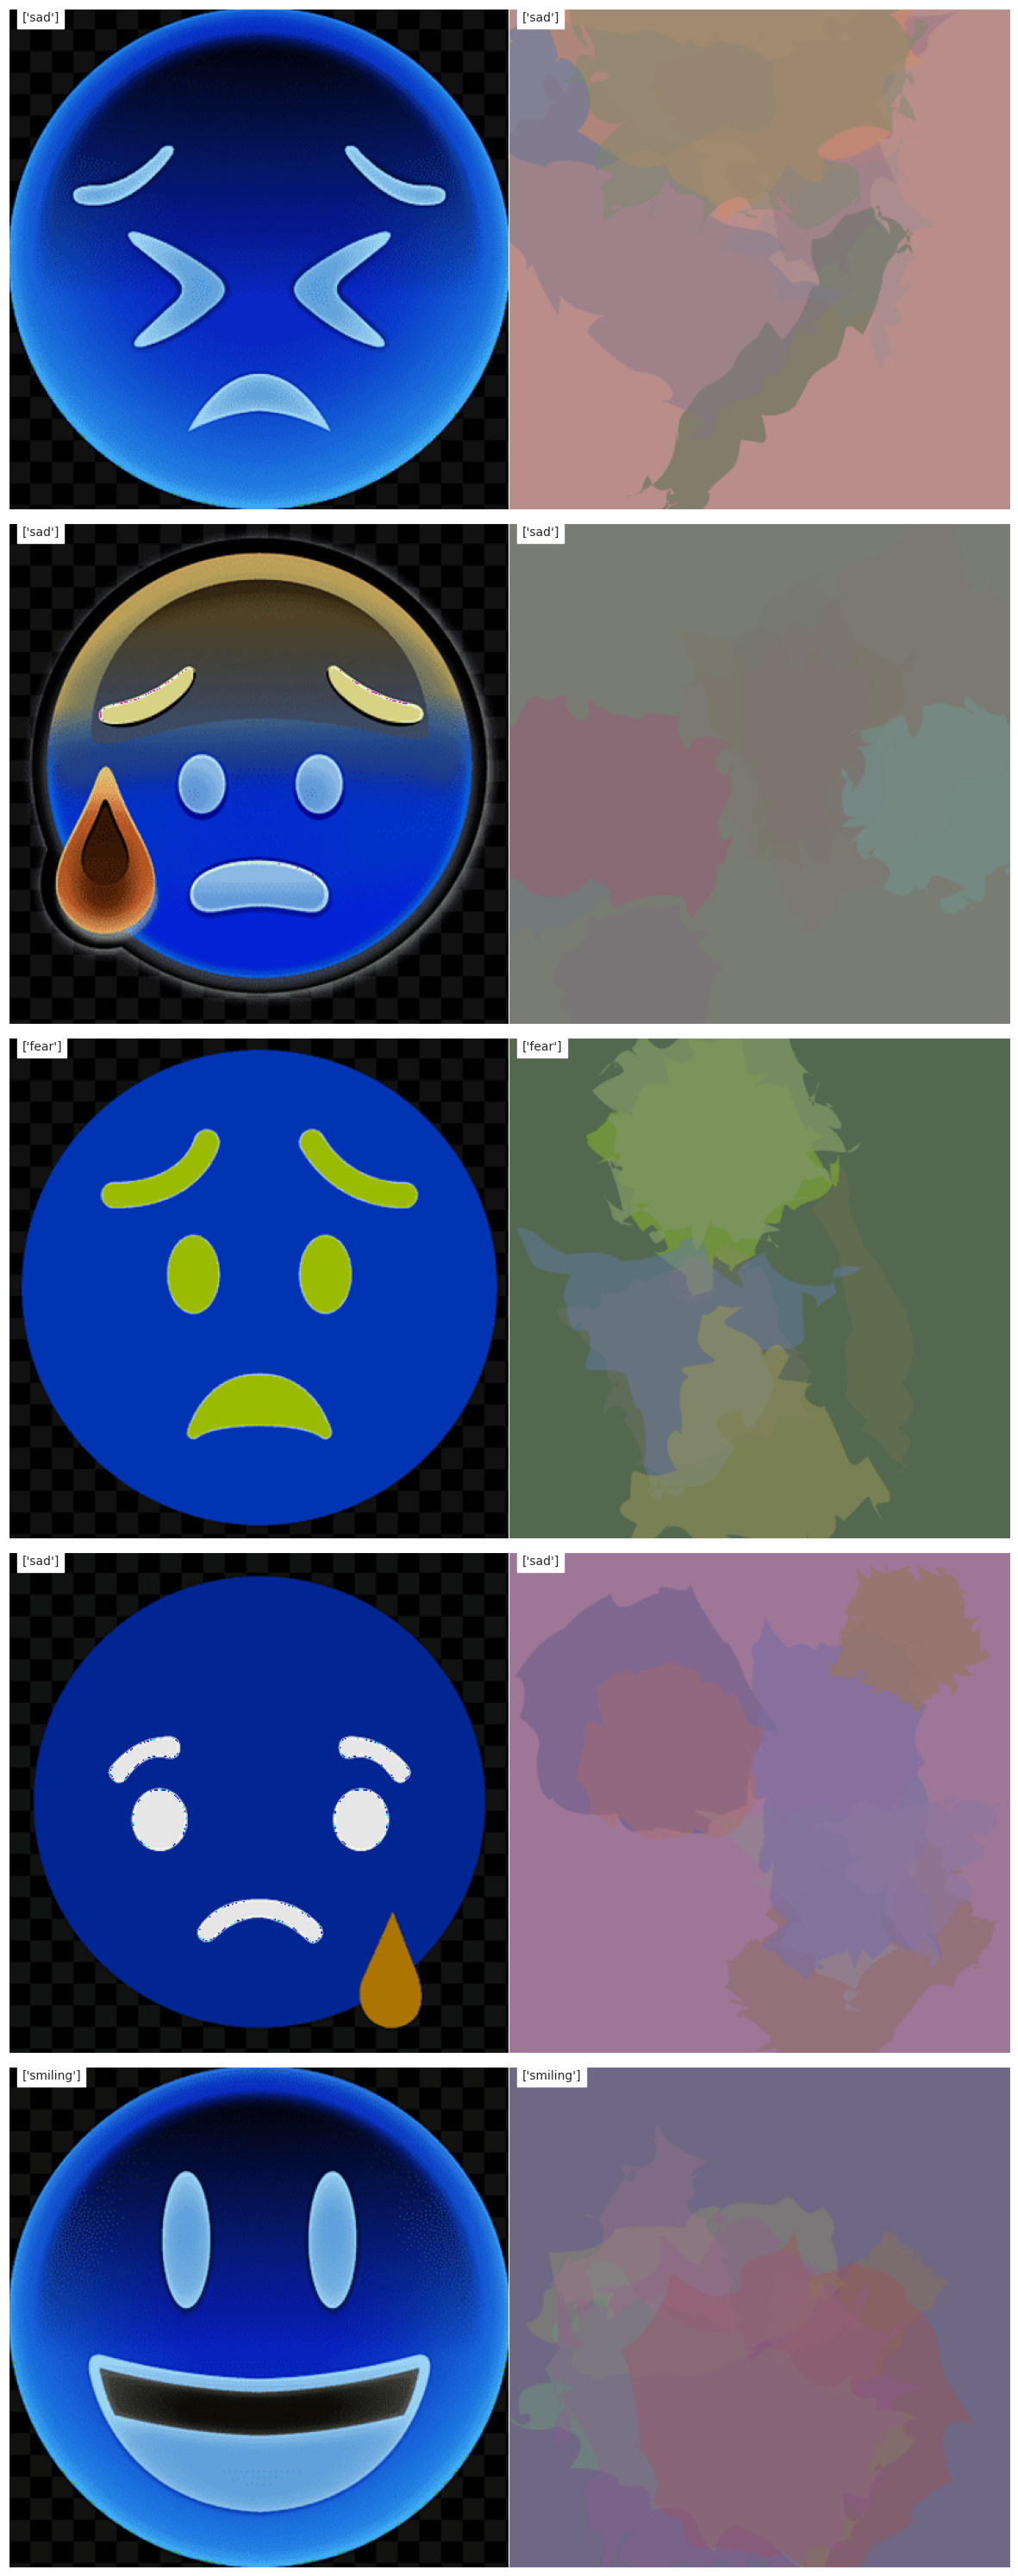

/home/dmitriy/OVE/covergan/weights/cgan_out.pt saved


torch.Size([8, 3, 400, 400])
torch.Size([8, 3, 400, 400])
torch.Size([8, 3, 400, 400])


Epoch 1 (step 3): Generator Loss: 0.0, Discriminator Adversarial Loss: 0.0, Discriminator Mismatches Loss: 0.0


Saving losses to png file


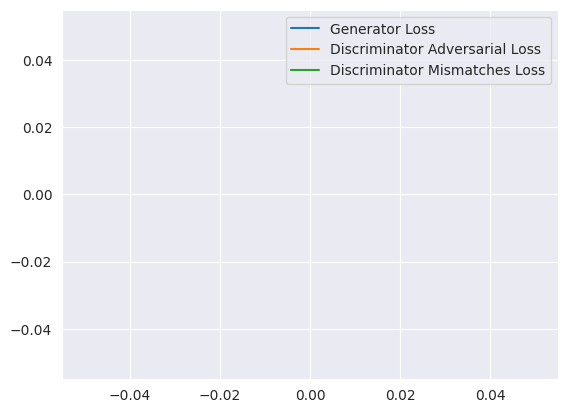

Saving covers to png file


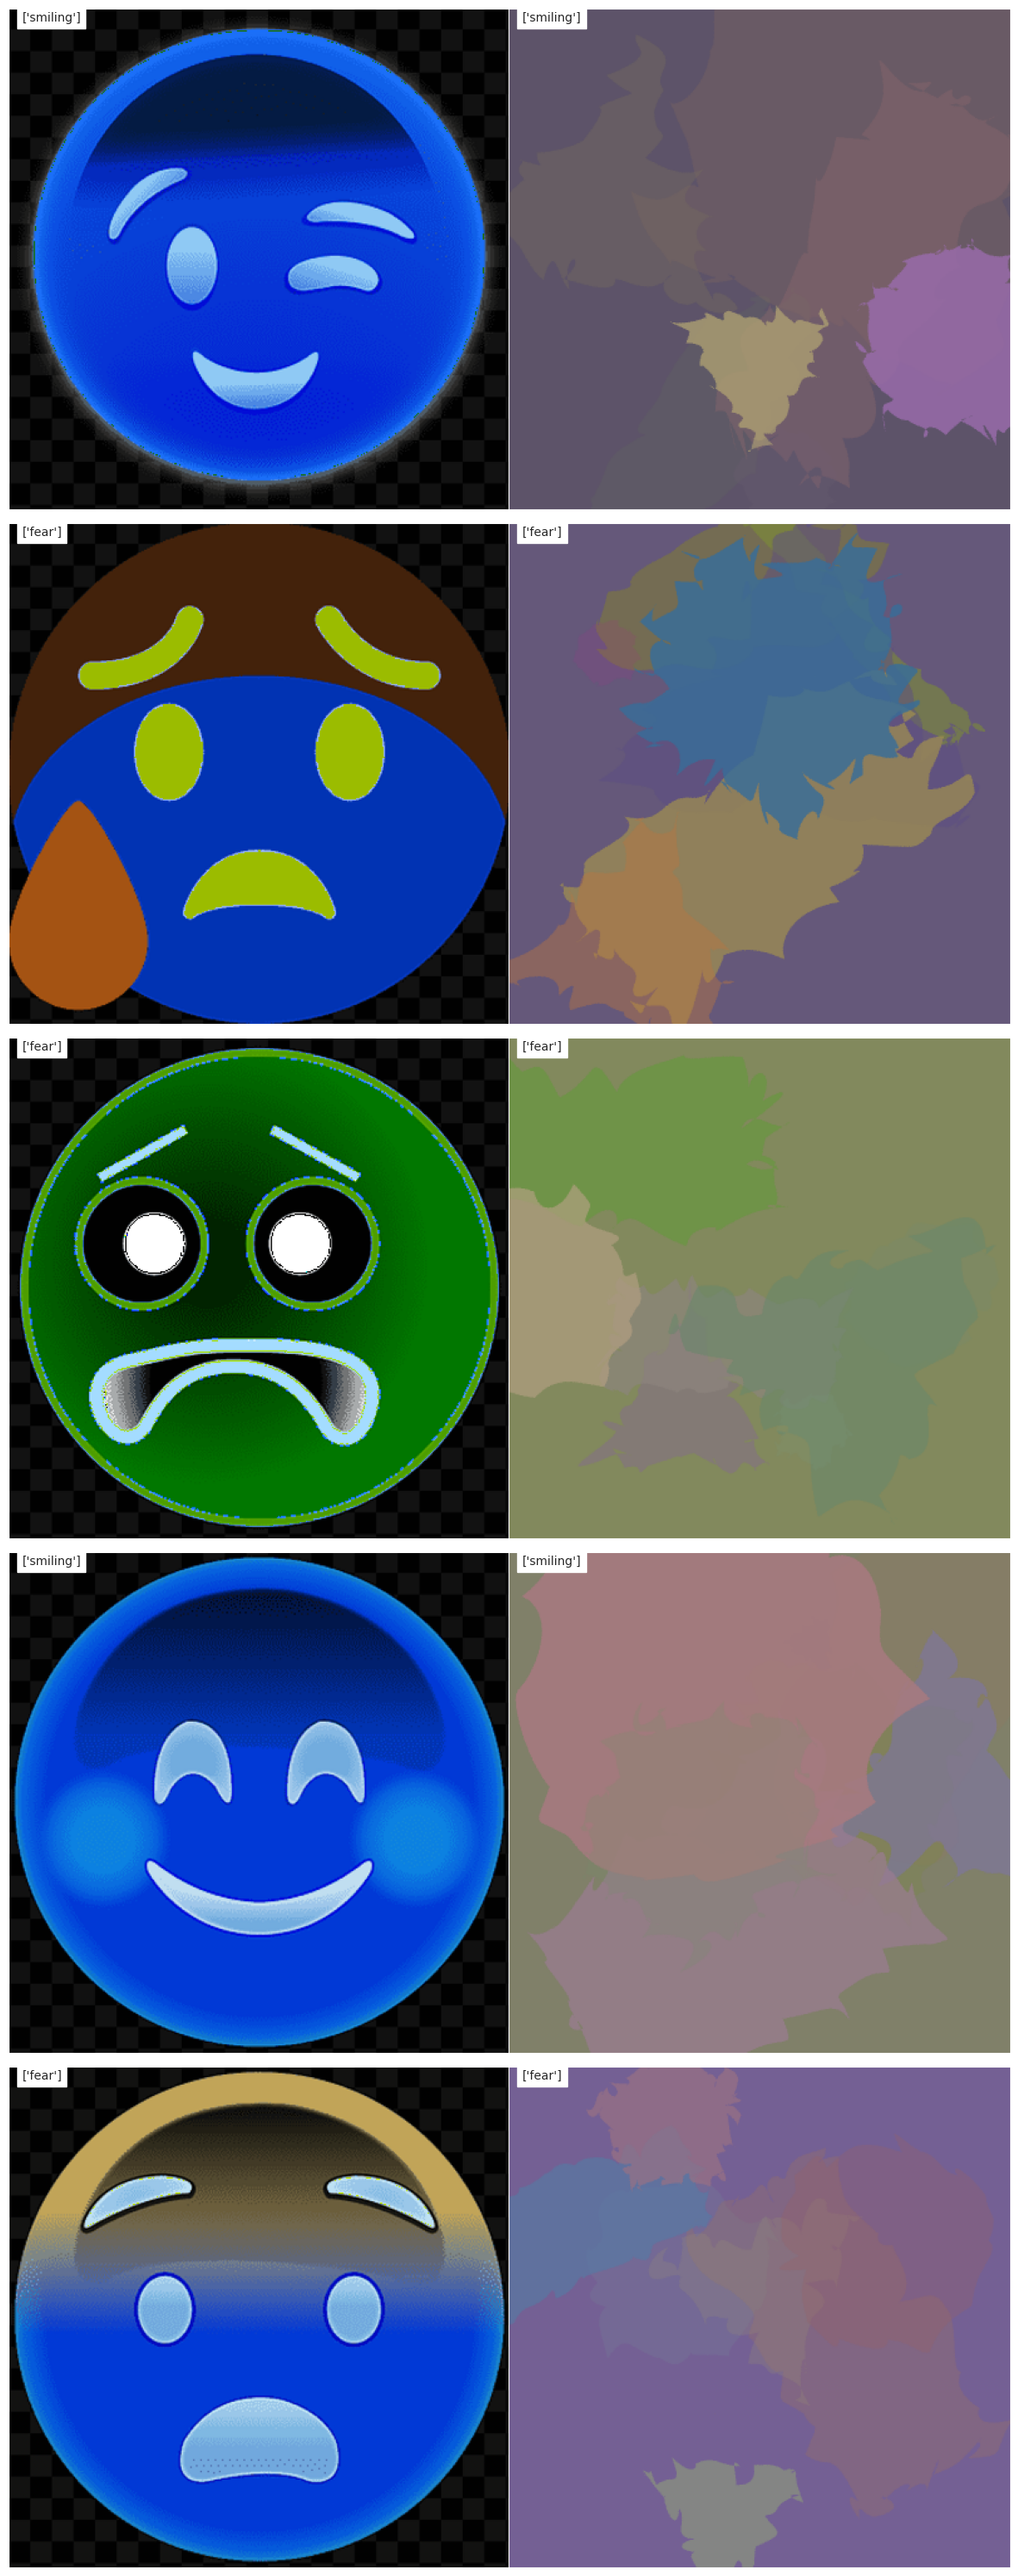

/home/dmitriy/OVE/covergan/weights/cgan_out.pt saved


torch.Size([8, 3, 400, 400])
HERE2
torch.Size([8, 3, 400, 400])
torch.Size([8, 3, 400, 400])
torch.Size([8, 3, 400, 400])


Epoch 1 (step 6): Generator Loss: 0.06352465848128001, Discriminator Adversarial Loss: 3.242397054036459, Discriminator Mismatches Loss: -1.728832721710205e-05


Saving losses to png file


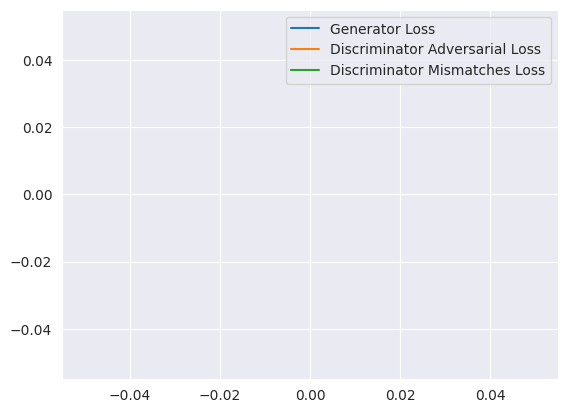

Saving covers to png file


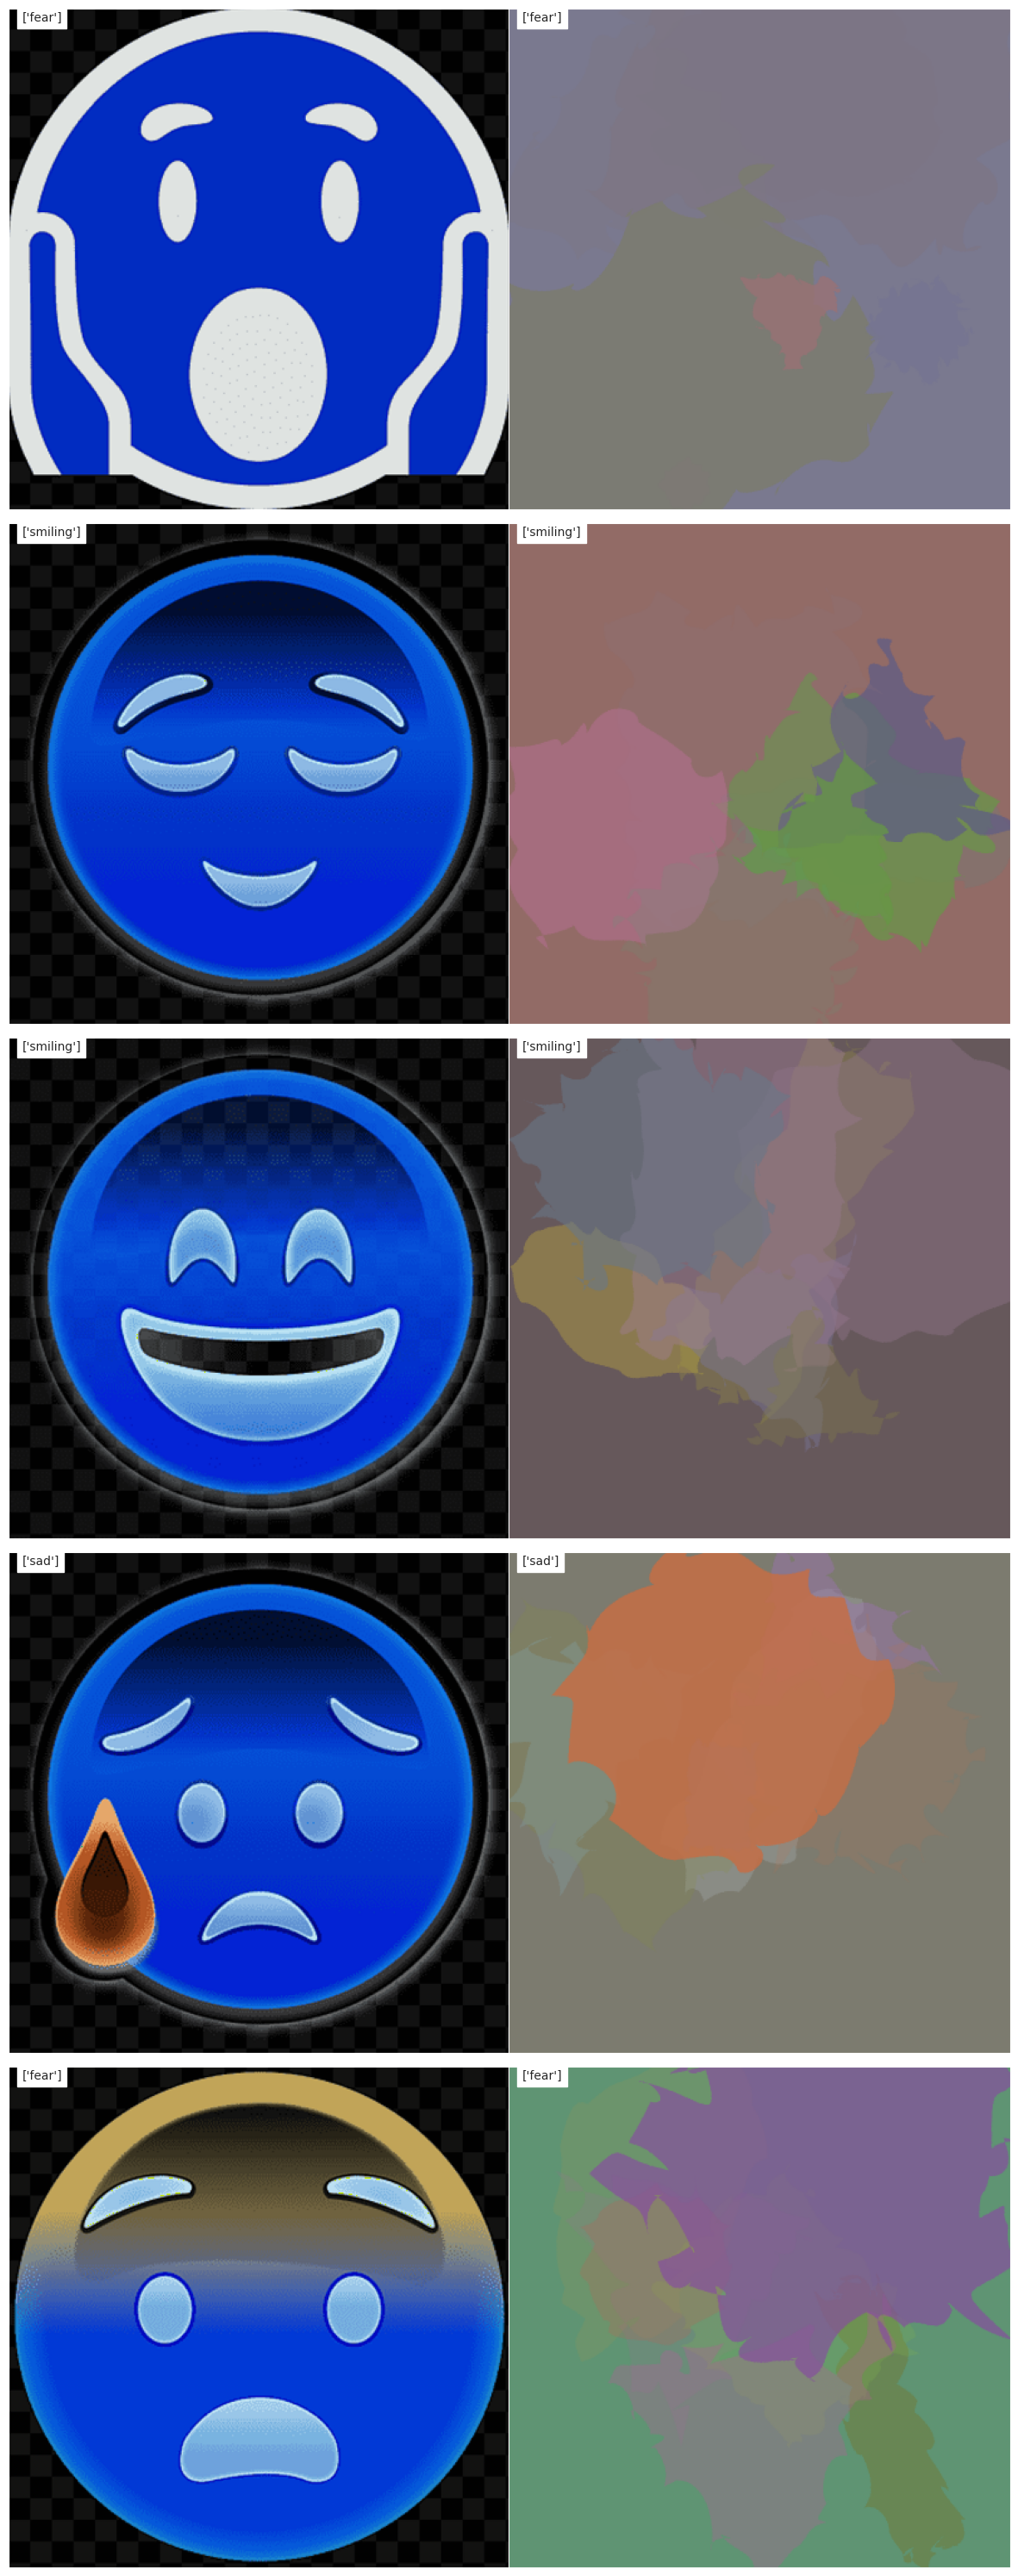

/home/dmitriy/OVE/covergan/weights/cgan_out.pt saved


torch.Size([8, 3, 400, 400])
torch.Size([8, 3, 400, 400])
torch.Size([8, 3, 400, 400])
HERE2


Epoch 1 (step 9): Generator Loss: 0.0415942445397377, Discriminator Adversarial Loss: 6.625857098897299, Discriminator Mismatches Loss: -1.587867736816406e-05


torch.Size([8, 3, 400, 400])
Saving losses to png file


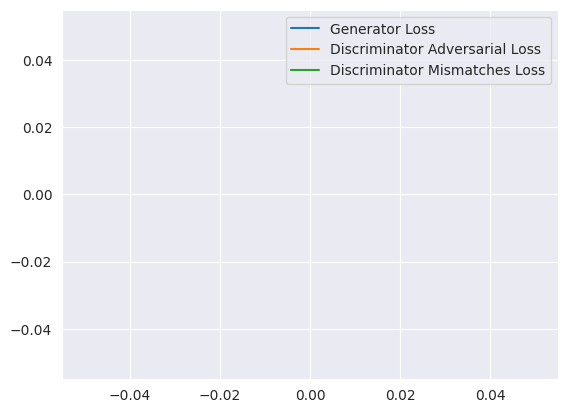

Saving covers to png file


KeyboardInterrupt: 

In [239]:
from IPython.display import clear_output
palette_generator = colorer
def generate(z, audio_embedding_disc):
    if palette_generator is None:
        return gen(z, audio_embedding_disc)
    return gen(z, audio_embedding_disc, palette_generator=palette_generator)

logger.info(f'PyDiffVG uses GPU: {pydiffvg.get_use_gpu()}')
# logger.info(gen)
# logger.info(disc)

n_epochs = 10
disc_repeats = 5#Discriminator runs per iteration


disc_lr = gen_lr = 3e-4

z_dim = 8
disc_slices = 1
checkpoint_root = '/home/dmitriy/OVE/covergan/weights'
display_steps = 3
backup_epochs = 5
bin_steps = 20
plot_grad = False
c_lambda = 10

batch_size=8
dataloader = DataLoader(dataset_image,drop_last=True, batch_size=batch_size, shuffle=True)

gen_opt = torch.optim.Adam(gen.parameters(), lr=gen_lr, betas=(0.5, 0.9))
disc_opt = torch.optim.Adam(disc.parameters(), lr=disc_lr, betas=(0.5, 0.9))
cgan_out_name='cgan_out'
print("Trying to load checkpoint.")
epochs_done = load_checkpoint(checkpoint_root, cgan_out_name, [gen, disc, gen_opt, disc_opt])
if epochs_done:
    logger.info(f"Loaded a checkpoint with {epochs_done} epochs done")

cur_step = 0
generator_losses = []
discriminator_losses = []
shuffle_losses = []
val_metrics = []

disc_repeat_cnt = 0
mean_iteration_disc_loss, mean_shuffle_disc_loss = 0, 0
for epoch in range(epochs_done + 1, n_epochs + epochs_done + 1):
    for emotion,image in tqdm(dataloader):
        torch.cuda.empty_cache()
        emotion = emotion.float().to(device)
        image = image.to(device)
        emotion_disc = emotion
        cur_batch_size = len(emotion)

        def get_fake_pred(should_detach: bool):
            # Get noise corresponding to the current batch_size
            z = get_noise(cur_batch_size, z_dim, device=device)

            if should_detach:
                with torch.no_grad():
                    fake_covers = generate(z, emotion_disc)
                    fig_params = None
            else:
                # fake_covers, fig_params = gen(z, audio_embedding_disc, emotions, return_figure_params=True)
                fake_covers = generate(z, emotion_disc)
                fig_params = None
            # Make sure that enough shapes were generated
            assert len(fake_covers) == len(image)
            print(fake_covers.shape)
            fake_pred = disc(fake_covers, emotion_disc)

            assert len(fake_pred) == len(fake_covers)
            return fake_covers, fake_pred, fig_params

        # ### Update discriminator with fakes ###
        # Zero out the discriminator gradients
        disc_opt.zero_grad()

        fake_cover_tensor, disc_fake_pred, fig_params = get_fake_pred(should_detach=True)
        disc_real_pred = disc(image.permute(0,3,1,2), emotion)

        # Make sure that enough predictions were made
        assert len(disc_real_pred) == len(image)
        # Shapes must match
        assert tuple(disc_fake_pred.shape) == tuple(disc_real_pred.shape)

        gp = get_gradient_penalty(disc, image.permute(0,3,1,2).data, fake_cover_tensor.data,
                                  emotion)
        disc_loss = disc_fake_pred.mean() - disc_real_pred.mean() + c_lambda*gp
        # Keep track of the average critic loss in this batch
        mean_iteration_disc_loss += disc_loss.item() / disc_repeats
        disc_repeat_cnt += 1
        # Update gradients
        # disc_loss.backward()
        if plot_grad:
            plot_grad_flow(disc.named_parameters(), "discriminator (fakes)", epoch=epoch, cur_step=cur_step)
        # Update optimizer
        disc_opt.step()
        ###
        shuffle_cover_tensor = mismatching_permute(image.permute(0,3,1,2))###

        if True:
            # ### Update discriminator with matching and shuffled cover-embedding pairs ###
            disc_opt.zero_grad()

            disc_real_pred = disc(image.permute(0,3,1,2), emotion)
            disc_shuffle_pred = disc(shuffle_cover_tensor, emotion)
            disc_loss = disc_shuffle_pred.mean() - disc_real_pred.mean()

            mean_shuffle_disc_loss += disc_loss.item() / disc_repeats

            # Update gradients
            # disc_loss.backward()
            if plot_grad:
                plot_grad_flow(disc.named_parameters(), "discriminator (shuffled pairs)", epoch=epoch,
                               cur_step=cur_step)
            disc_opt.step()
        if disc_repeat_cnt == disc_repeats:
            print('HERE2')
            # Keep track of the average discriminator loss
            discriminator_losses.append(mean_iteration_disc_loss)
            shuffle_losses.append(mean_shuffle_disc_loss)
            disc_repeat_cnt = 0
            mean_iteration_disc_loss, mean_shuffle_disc_loss = 0, 0

            # ### Update generator ###
            # Zero out the generator gradients
            gen_opt.zero_grad()

            # Getting fake shapes, same as in the loop above
            fake_cover_tensor, disc_fake_pred, fig_params = get_fake_pred(should_detach=False)

            # p_dist = torch.nn.PairwiseDistance()
            # dist_loss_sum = torch.tensor(0.0).to(fake_cover_tensor.device)
            # for figs in fig_params:
            #     cur_batch_dist_loss = torch.tensor(0.0).to(fake_cover_tensor.device)
            #     for ind_x, x in enumerate(figs):
            #         for ind_y in range(ind_x + 1, len(figs)):
            #             a = x["center_point"]
            #             b = figs[ind_y]["center_point"]
            #             cur_batch_dist_loss += 50000 / (p_dist(a, b)) ** 3
            #     dist_loss_sum += cur_batch_dist_loss / len(figs)
            #
            # dist_loss_sum = dist_loss_sum / len(fig_params)
            # dist_loss_sum.backward()
            # gen_loss = -disc_fake_pred.mean() + dist_loss_sum
            gen_loss = -disc_fake_pred.mean()
            # gen_loss.backward()
            # gen_loss.backward()
            if plot_grad:
                plot_grad_flow(gen.named_parameters(), "generator", epoch=epoch, cur_step=cur_step)

            # Update the weights
            gen_opt.step()

            # Keep track of the generator losses
            generator_losses.append(gen_loss.item())
        # clear_output()
        plot_losses(epoch, cur_step, display_steps, bin_steps, [
            ("Generator", generator_losses),
            ("Discriminator Adversarial", discriminator_losses),
            ("Discriminator Mismatches", shuffle_losses)
        ])
        if cur_step % display_steps == 0:
            plot_real_fake_covers(emotion,image.permute(0,3,1,2), fake_cover_tensor, disc_real_pred, disc_fake_pred, epoch=epoch,
                                  cur_step=cur_step)
            save_checkpoint(checkpoint_root, cgan_out_name, epoch, 0, [gen, disc, gen_opt, disc_opt])
        cur_step += 1


In [44]:
z = get_noise(2, z_dim, device=device)

In [45]:
dataloader2 = DataLoader(dataset_image,drop_last=True, batch_size=2, shuffle=True)

In [46]:
z

tensor([[ 0.1662, -0.1878, -1.4860, -1.0102, -0.5808, -0.5250, -0.0602,  0.6572],
        [ 1.2507, -0.9151,  1.8617,  0.6268,  2.5358, -0.2205, -1.5716,  0.0220]])

In [47]:
a = next(iter(dataloader2))[0]

In [48]:
gen.train(False)

MyGeneratorFixedSixFigs32Good(
  (model_): Sequential(
    (0): Linear(in_features=17, out_features=242, bias=True)
    (1): BatchNorm1d(242, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=242, out_features=467, bias=True)
    (4): BatchNorm1d(467, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=467, out_features=692, bias=True)
    (7): BatchNorm1d(692, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ELU(alpha=1.0)
    (9): Linear(in_features=692, out_features=917, bias=True)
    (10): BatchNorm1d(917, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ELU(alpha=1.0)
    (12): Linear(in_features=917, out_features=1142, bias=True)
    (13): Tanh()
  )
)

In [49]:
b = gen(z, a, palette_generator=palette_generator,return_diffvg_svg_params=True)[0]

In [57]:
b[0]

(400,
 400,
  <pydiffvg.shape.ShapeGroup at 0x7f144c10c760>])

In [58]:
for ind, params in enumerate(b):
    pydiffvg.save_svg(f'/home/dmitriy/OVE/plots/back_diffvg_svg_{ind}.svg', *params)

In [59]:
# from service_utils import add_filter
# from service_utils import OverlayFilter
# num_samples = 2
# # filtered_samples = round(num_samples // 2)
# filtered_samples = num_samples
# filters = list(OverlayFilter)
# for psvg_cover in b[-filtered_samples:]:
#     overlay_filter = random.choice(filters)
#     add_filter(psvg_cover, overlay_filter)

AttributeError: 'tuple' object has no attribute 'add_inner_node'